Question 1

1. Data is stored in nodes, nodes are connected to other nodes, the end of a node is called a leaf (meaning it has no child node). A model will use this as a classifier and identify certain features in the data, going down the tree until the test data is fully classified.
2. The data is split (hence the term tree), If something is nonlinear its likely dependent and therefore can be used to identify a trait.
3. Gini is less computationally expensive than the other most common loss function for trees, entropy.
4. Trees typically use a loss function such as gini to decide how many times to split and create child nodes. If it sees a lot of noise you can expect more child nodes to be created than you need, causing overfitting.
5. False. Trees are generally not great in cases where high dimensional data is involved. This would create lots of splits and increase the likelihood of overfitting.
6. Multiple splits decrease the efficacy of loss functions such as gini, increase computational resource use, and increase the risk of overfitting.
7. If the ways the data is being split seems unintuitive it is probably overfit. If you would expect there to be more leaves in the data it is likely underfit.

Question 2

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression

In [80]:
df = pd.read_csv('cars_hw.csv')
df

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000
...,...,...,...,...,...,...,...,...,...,...,...,...
971,972,Hyundai,2018,white,sedan,23869,1st,5,petrol,6-Speed,Automatic,956000
972,973,Hyundai,2019,white,sedan,14831,1st,5,petrol,6-Speed,Automatic,1027000
973,974,Hyundai,2014,silver,sedan,52846,1st,5,petrol,4-Speed,Automatic,736000
974,975,Ford,2020,white,crossover,28335,2nd,5,diesel,5-Speed,Automatic,749000


In [81]:
dummy = pd.get_dummies(df[['Make','No_of_Owners','Fuel_Type','Transmission_Type',
                       'Color','Transmission','Body_Type']])
dummy

,Make_Chevrolet,Make_Datsun,Make_Ford,Make_Honda,Make_Hyundai,Make_Jeep,Make_Kia,Make_MG Motors,Make_Mahindra,Make_Maruti Suzuki,...,Transmission_4-Speed,Transmission_5-Speed,Transmission_6-Speed,Transmission_7-Speed,Transmission_CVT,Body_Type_crossover,Body_Type_hatchback,Body_Type_muv,Body_Type_sedan,Body_Type_suv
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,False,False,False,False,True,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,False,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
972,False,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
973,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
974,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False


In [82]:
X_train, X_test, y_train, y_test = train_test_split(dummy, df['Price'], test_size=0.2)

min_samples_leaf: 25, R2: 0.6357519580950965


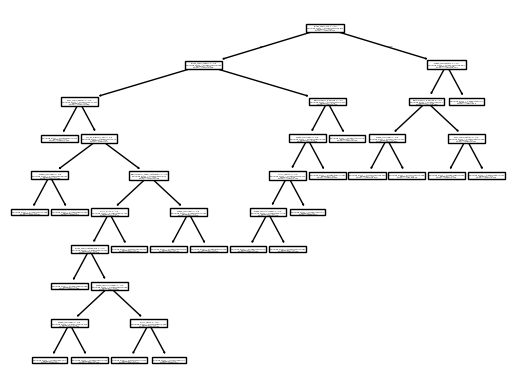

In [83]:
for min_samples_leaf in range(1, 26):
    model = DecisionTreeRegressor(min_samples_leaf=min_samples_leaf)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = model.score(X_test, y_test)
print(f"min_samples_leaf: {min_samples_leaf}, R2: {r2}")
plt.figure()
plot_tree(model, feature_names=dummy.columns)
plt.show()

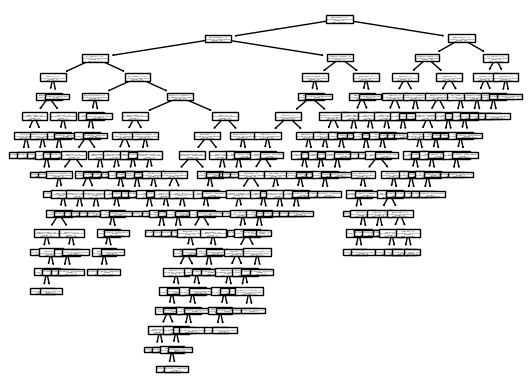

R2: 0.749589707714974, RMSE: 214983.7943992662


In [84]:
model = DecisionTreeRegressor(min_samples_leaf=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = model.score(X_test, y_test)
rmse = np.sqrt(np.mean((y_test - y_pred)**2))
plt.figure()
plot_tree(model, feature_names=dummy.columns)
plt.show()
print(f"R2: {r2}, RMSE: {rmse}")

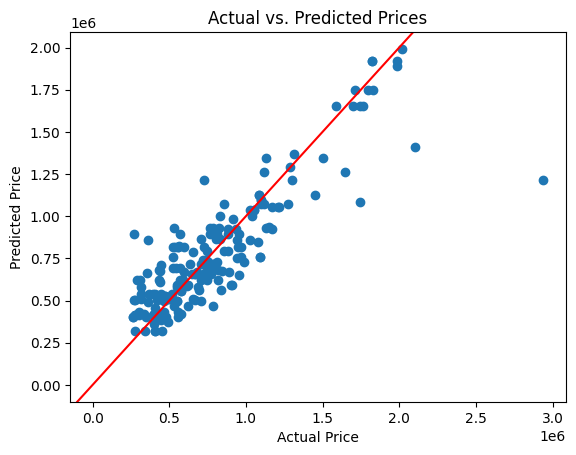

In [85]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.axline([0, 0], [1, 1], color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices')
plt.show()

I wasnt sure how to get a dendogram, looking it up I saw there were other packages that allowed you to make a dendogram, but we weren't asked to download, so I instead made a tree. The data is centered around 0.

R2: 0.6973335118110517, RMSE: 236353.37330745498


Text(0.5, 1.0, 'Actual vs. Predicted Prices')

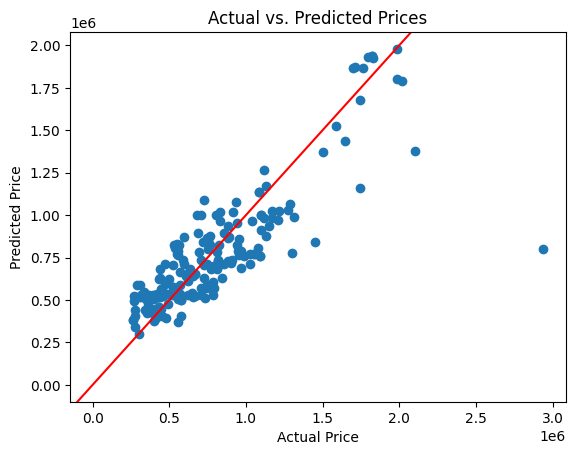

In [86]:
linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)
r2 = linear.score(X_test, y_test)
rmse = np.sqrt(np.mean((y_test - y_pred)**2))
print(f"R2: {r2}, RMSE: {rmse}")
plt.figure()
plt.scatter(y_test, y_pred)
plt.axline([0, 0], [1, 1], color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices')

The linear regression seems to better plot describe the data. its closer to the line which means its better represented by a trend line.

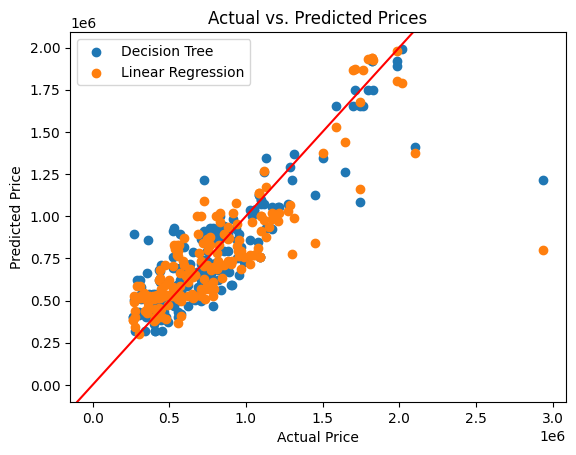

In [87]:
tree_model = DecisionTreeRegressor(min_samples_leaf=3)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)
y_pred_lin = linear.predict(X_test)
r2_tree = tree_model.score(X_test, y_test)
r2_lin = linear.score(X_test, y_test)
plt.figure()
plt.scatter(y_test, y_pred, label='Decision Tree')
plt.scatter(y_test, y_pred_lin, label='Linear Regression')
plt.axline([0, 0], [1, 1], color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.show()

In [88]:
rmse_tree = np.sqrt(np.mean((y_test - y_pred)**2))
rmse_lin = np.sqrt(np.mean((y_test - y_pred_lin)**2))
print(f"Decision Tree R2: {r2_tree}, RMSE: {rmse_tree}")
print(f"Linear Regression R2: {r2_lin}, RMSE: {rmse_lin}")

Decision Tree R2: 0.7480583589966356, RMSE: 215640.1439665325
Linear Regression R2: 0.6973335118110517, RMSE: 236353.37330745498


They both seem close, but the linear regression seems to fit the data a little better with fewer outliers.

Question 4

In [89]:
ratings = pd.read_csv('corporate_ratings.csv')
ratings.shape

(2029, 31)

2029 observations, 31 variables

In [90]:
ratings

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,BBB,"NVR, Inc.",NVR,Moody's Investors Service,9/5/2012,Capital Goods,11.757767,7.115059,7.057420,1.079762,...,0.343500,0.953231,50.293155,230.194971,1.759461,0.086376,15.867701,52.760726,0.083018,15.758348
2025,BB,Kaiser Aluminum Corporation,KALU,Standard & Poor's Ratings Services,4/28/2016,Capital Goods,2.962788,1.294743,0.428234,30.602414,...,0.363636,0.602645,5.563630,5.958956,1.614282,-0.267117,-4.729967,9.232021,0.114089,14.542373
2026,B,Cresud S.A.C.I.F. y A.,CRESY,Fitch Ratings,11/30/2012,Finance,0.883875,0.842553,0.233830,147.599371,...,35.017544,0.926665,1.459801,1.056480,4.034952,0.265092,9.358311,1.575328,0.283634,2.300168
2027,B,Cresud S.A.C.I.F. y A.,CRESY,Fitch Ratings,6/15/2012,Finance,0.911713,0.748356,0.310640,131.644566,...,0.331525,0.692804,0.744377,1.470201,3.825856,0.130692,22.440102,1.074441,0.217783,1.997608


<Axes: xlabel='Rating', ylabel='Count'>

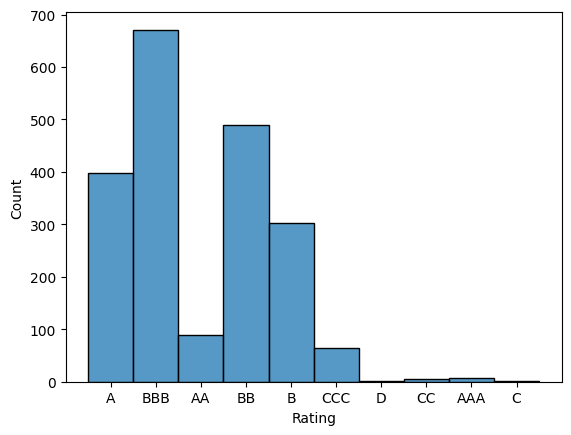

In [91]:
sns.histplot(ratings['Rating'])

In [92]:
rating = {'AAA':'A','AA':'A','A':'A','BBB':'B','BB':'B','B':'B','CCC':'C','CC':'C','C':'C'}
ratings['Rating'] = ratings['Rating'].map(rating).dropna()

<Axes: xlabel='Rating', ylabel='Count'>

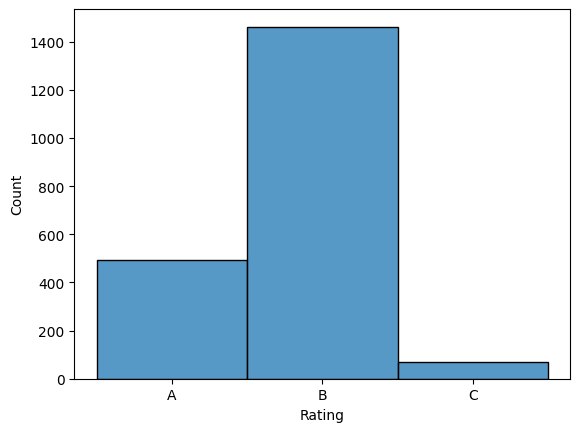

In [93]:
sns.histplot(ratings['Rating'])

In [94]:
dummy = pd.get_dummies(ratings.iloc[:,5])
num = ratings.iloc[:,6:31]
X = pd.concat([num, dummy], axis=1)
X

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Health Care,Miscellaneous,Public Utilities,Technology,Transportation
0,0.945894,0.426395,0.099690,44.203245,0.037480,0.049351,0.176631,0.061510,0.041189,0.091514,...,True,False,False,False,False,False,False,False,False,False
1,1.033559,0.498234,0.203120,38.991156,0.044062,0.048857,0.175715,0.066546,0.053204,0.104800,...,True,False,False,False,False,False,False,False,False,False
2,0.963703,0.451505,0.122099,50.841385,0.032709,0.044334,0.170843,0.059783,0.032497,0.075955,...,True,False,False,False,False,False,False,False,False,False
3,1.019851,0.510402,0.176116,41.161738,0.020894,-0.012858,0.138059,0.042430,0.025690,-0.027015,...,True,False,False,False,False,False,False,False,False,False
4,0.957844,0.495432,0.141608,47.761126,0.042861,0.053770,0.177720,0.065354,0.046363,0.096945,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,11.757767,7.115059,7.057420,1.079762,0.056706,0.086376,1.000000,0.077844,0.069328,0.112672,...,False,False,False,False,False,False,False,False,False,False
2025,2.962788,1.294743,0.428234,30.602414,-0.169983,-0.267117,0.198649,-0.248509,-0.189265,-0.344004,...,False,False,False,False,False,False,False,False,False,False
2026,0.883875,0.842553,0.233830,147.599371,-0.007458,0.000219,0.384390,0.185418,-0.002066,0.091267,...,False,False,False,False,True,False,False,False,False,False
2027,0.911713,0.748356,0.310640,131.644566,0.087365,0.130692,0.414916,0.286236,0.021251,0.040450,...,False,False,False,False,True,False,False,False,False,False


In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, dummy, test_size=0.2)
decision_tree = DecisionTreeRegressor(min_samples_leaf=3)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

In [100]:
from sklearn.metrics import multilabel_confusion_matrix

In [97]:
y_pred_single_label = np.argmax(y_pred, axis=1)
y_test_single_label = np.argmax(y_test.to_numpy(), axis=1)

In [101]:
confusion = multilabel_confusion_matrix(y_test, y_pred)
confusion

array([[[355,   0],
        [  0,  51]],

       [[359,   0],
        [  0,  47]],

       [[388,   0],
        [  0,  18]],

       [[379,   0],
        [  0,  27]],

       [[357,   0],
        [  0,  49]],

       [[356,   0],
        [  0,  50]],

       [[395,   0],
        [  0,  11]],

       [[376,   0],
        [  0,  30]],

       [[393,   0],
        [  0,  13]],

       [[358,   0],
        [  0,  48]],

       [[358,   0],
        [  0,  48]],

       [[392,   0],
        [  0,  14]]])

Looks very accurate, probably because of a mistake I made but this output suggests that there are no false positives or false negatives.

In [102]:
dummy = pd.get_dummies(ratings.iloc[:,5])
dummy2 = pd.get_dummies(ratings.iloc[:,3])
num = ratings.iloc[:,6:31]
X = pd.concat([num, dummy,dummy2], axis=1)
X

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,Health Care,Miscellaneous,Public Utilities,Technology,Transportation,DBRS,Egan-Jones Ratings Company,Fitch Ratings,Moody's Investors Service,Standard & Poor's Ratings Services
0,0.945894,0.426395,0.099690,44.203245,0.037480,0.049351,0.176631,0.061510,0.041189,0.091514,...,False,False,False,False,False,False,True,False,False,False
1,1.033559,0.498234,0.203120,38.991156,0.044062,0.048857,0.175715,0.066546,0.053204,0.104800,...,False,False,False,False,False,False,True,False,False,False
2,0.963703,0.451505,0.122099,50.841385,0.032709,0.044334,0.170843,0.059783,0.032497,0.075955,...,False,False,False,False,False,False,False,True,False,False
3,1.019851,0.510402,0.176116,41.161738,0.020894,-0.012858,0.138059,0.042430,0.025690,-0.027015,...,False,False,False,False,False,False,False,True,False,False
4,0.957844,0.495432,0.141608,47.761126,0.042861,0.053770,0.177720,0.065354,0.046363,0.096945,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,11.757767,7.115059,7.057420,1.079762,0.056706,0.086376,1.000000,0.077844,0.069328,0.112672,...,False,False,False,False,False,False,False,False,True,False
2025,2.962788,1.294743,0.428234,30.602414,-0.169983,-0.267117,0.198649,-0.248509,-0.189265,-0.344004,...,False,False,False,False,False,False,False,False,False,True
2026,0.883875,0.842553,0.233830,147.599371,-0.007458,0.000219,0.384390,0.185418,-0.002066,0.091267,...,False,False,False,False,False,False,False,True,False,False
2027,0.911713,0.748356,0.310640,131.644566,0.087365,0.130692,0.414916,0.286236,0.021251,0.040450,...,False,False,False,False,False,False,False,True,False,False


In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, dummy2, test_size=0.2)
decision_tree = DecisionTreeRegressor(min_samples_leaf=3)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

In [107]:
y_pred_single_label = np.argmax(y_pred, axis=1)
y_test_single_label = np.argmax(y_test.to_numpy(), axis=1)

In [108]:
confusion = multilabel_confusion_matrix(y_test, y_pred)
confusion

array([[[406,   0],
        [  0,   0]],

       [[275,   0],
        [  0, 131]],

       [[386,   0],
        [  0,  20]],

       [[299,   0],
        [  0, 107]],

       [[258,   0],
        [  0, 148]]])

This time I'm seeing more false negatives compared to the first run through.